In [1]:
import glob
from tqdm import tqdm

from IPython.display import clear_output

import matplotlib.pyplot as plt
import numpy as np

from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import astropy.units as u

from reproject.mosaicking import find_optimal_celestial_wcs, reproject_and_coadd
from reproject import reproject_interp

## Looking at One File

In [2]:
proj_folder = 'C:/Users/dorya/OneDrive - Lancaster University/personal-pc-phd-work/summer-student-proj'

In [3]:
fits_files = glob.glob(f'{proj_folder}/data/fits-files/*.fits')

In [7]:
with fits.open(fits_files[0]) as hdul:
    header = hdul[0].header
    data = hdul[0].data

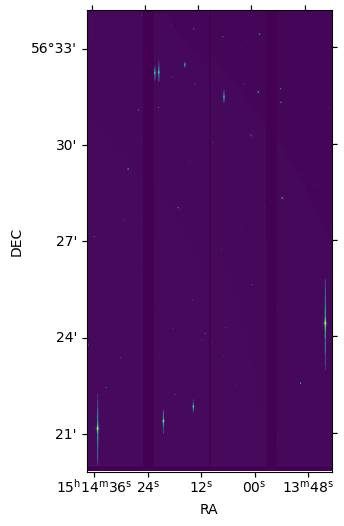

In [17]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(projection = WCS(header))
ax.imshow(data, origin = 'lower')
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
clear_output(wait = True)
plt.show()

## Selecting Galaxy Images

In [18]:
ra = 228.973696
dec = 56.328850

In [19]:
coord = SkyCoord(ra = ra * u.deg, dec = dec * u.deg, frame = 'icrs')

In [21]:
galaxy_files = []
for i in tqdm(fits_files):
    header = fits.getheader(i)
    wcs = WCS(header)
    clear_output(wait = True)
    if wcs.footprint_contains(coord):
        galaxy_files.append(i)

100%|██████████| 170/170 [00:09<00:00, 18.33it/s]


## Looking at Them

In [23]:
hduls = [fits.open(file)[0] for file in galaxy_files]

In [27]:
wcs_out, shape_out = find_optimal_celestial_wcs(hduls)
array, footprint = reproject_and_coadd(hduls,
                                       wcs_out, shape_out=shape_out,
                                       reproject_function=reproject_interp)
clear_output(wait = True)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set DATE-END to '2010-04-12T14:11:21.062' from MJD-END'. [astropy.wcs.wcs]
  'degree' -> 'deg',
  'degree' -> 'deg'. [astropy.wcs.wcs]
Set DATE-END to '2010-04-12T14:14:42.029' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2010-04-12T14:17:12.019' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2010-04-12T14:19:40.022' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2010-04-12T14:22:08.026' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2010-04-12T14:24:36.029' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2010-04-12T14:32:51.101' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2010-04-12T14:38:03.005' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2010-04-12T14:40:53.990' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2010-04-12T14:43:44.976' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2010-04-12T14:46:36.048' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2010-04-12T14:57:16.013' from 

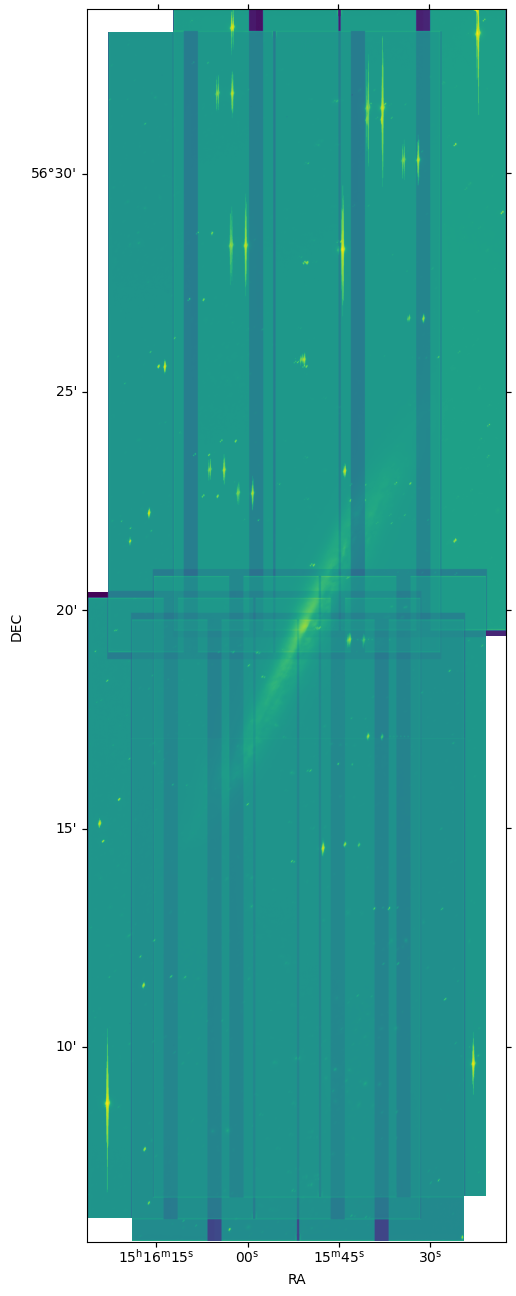

In [32]:
fig = plt.figure(figsize = (24,16))
ax = fig.add_subplot(111, projection = wcs_out)
ax.imshow(np.log10(array), origin = 'lower')
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
plt.show()